<a href="https://colab.research.google.com/github/Nivea5678/Yeti-Analytics/blob/main/Yeti_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np
import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, GRU, Dense
import io
from tensorflow.keras.optimizers.legacy import Adam



In [ ]:
# loading the data
from google.colab import files
uploaded = files.upload()

Saving Yeti Analytics.xlsx to Yeti Analytics.xlsx


In [ ]:
# Step 1: Load the dataset
df = pd.read_excel('Yeti Analytics.xlsx')
df



,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


In [ ]:
df['Review'] = df['Review'].str.lower()


In [ ]:
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['Review'])
sequences = tokenizer.texts_to_sequences(df['Review'])

In [ ]:
# Padding the sequences to ensure equal length
padded_sequences = pad_sequences(sequences, maxlen=100)

<Axes: >

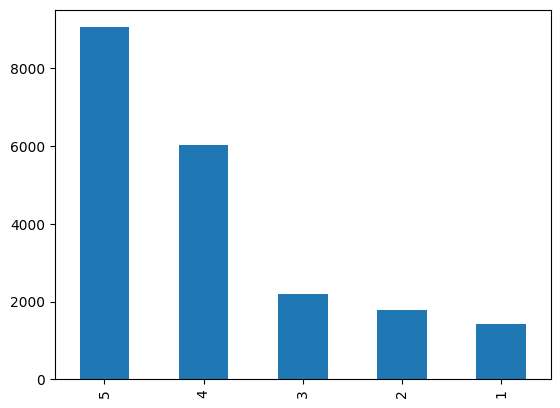

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df['Rating'].value_counts().plot(kind='bar')

In [ ]:
pip install langdetect


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=900dbbf44e9faa046a70a4e778c01c93339d622a03a975ae1fa6229ebd2b1a7e
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
pip install googletrans==4.0.0-rc1


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=780ac7836b539d99501c6f37e3aaafc98e568801312c5459b3d67be7dddea1a5
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans

In [ ]:
pip install emoji


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 355.8/355.8 kB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.0-py2.py3-none-any.whl size=351211 sha256=809e716c79db3224690694f9c81ba42d437c9a2bca8421802b26e8e1cbb899b8
  Stored in directory: /root/.cache/pip/wheels/2a/0c/2c/07b5af72b120503fe24590691d24c462a25e5e530db8700a96
Successfully built emoji


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from langdetect import detect
from googletrans import Translator
import emoji
from nltk.tokenize import sent_tokenize, word_tokenize

# Iterate over each row in the dataframe
for index, row in df.iterrows():
    review_text = row['Review']

 # Tokenization - Breaking review text into sentences and words
    sentences = sent_tokenize(review_text)
    words = word_tokenize(review_text)



In [ ]:
print("Sentences:", sentences)
print("Tokens:", tokens)

Sentences: ["people talking, ca n't believe excellent ratings hotel, just n't, yes patricia extremely helpful fluent languages goes way make welcome, said place bit dump, inexpensive hotel expensive city place bit dated institutional odor charm funeral home, walking steps hotel girlfriend step condom yes condom steps, lots guys hanging desk hallway, girlfriend swears house prostitution, patricia did arrange taxi following morning stayed night did wrong information cost fare, rooms clean large bathroom small, passable night glad leave following morning not recommend extended stay unless tight budget n't care look feel place,"]
Tokens: ['hotel', 'stayed', 'hotel', 'monaco', 'cruise', 'rooms', 'generous', 'decorated', 'uniquely', 'hotel', 'remodeled', 'pacific', 'bell', 'building', 'charm', 'sturdiness', 'everytime', 'walked', 'bell', 'men', 'felt', 'like', 'coming', 'home', 'secure', 'great', 'single', 'travelers', 'location', 'fabulous', 'walk', 'things', 'pike', 'market', 'space', 'sto

In [ ]:
# Segmentation - Splitting text into individual tokens
# Removing punctuation and special characters
tokens = [word for word in words if word.isalnum()]

# Normalization - Converting tokens to lowercase and lemmatization
lemmatizer = WordNetLemmatizer()
normalized_tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens]
print("Normalized Tokens:", normalized_tokens)

Normalized Tokens: ['people', 'talking', 'ca', 'believe', 'excellent', 'rating', 'hotel', 'just', 'yes', 'patricia', 'extremely', 'helpful', 'fluent', 'language', 'go', 'way', 'make', 'welcome', 'said', 'place', 'bit', 'dump', 'inexpensive', 'hotel', 'expensive', 'city', 'place', 'bit', 'dated', 'institutional', 'odor', 'charm', 'funeral', 'home', 'walking', 'step', 'hotel', 'girlfriend', 'step', 'condom', 'yes', 'condom', 'step', 'lot', 'guy', 'hanging', 'desk', 'hallway', 'girlfriend', 'swears', 'house', 'prostitution', 'patricia', 'did', 'arrange', 'taxi', 'following', 'morning', 'stayed', 'night', 'did', 'wrong', 'information', 'cost', 'fare', 'room', 'clean', 'large', 'bathroom', 'small', 'passable', 'night', 'glad', 'leave', 'following', 'morning', 'not', 'recommend', 'extended', 'stay', 'unless', 'tight', 'budget', 'care', 'look', 'feel', 'place']


In [ ]:
# Emoji Handling - Removing or replacing emojis
emoji_free_text = emoji.demojize(text)
print("Emoji-Free Text:", emoji_free_text)


Emoji-Free Text: hotel stayed hotel monaco cruise, rooms generous decorated uniquely, hotel remodeled pacific bell building charm sturdiness, everytime walked bell men felt like coming home, secure, great single travelers, location fabulous, walk things pike market space needle.little grocery/drug store block away, today green, bravo, 1 double bed room room bed couch separated curtain, snoring mom slept curtain, great food nearby,


In [ ]:
# Language Detection
language = detect(text)
print("Detected Language:", language)

Detected Language: en


In [ ]:
# Translation - Translating text to a different language
translator = Translator()
translated_text = translator.translate(text, dest='fr').text
print("Translated Text (to French):", translated_text)

Translated Text (to French): hôtel séjourné à l'hôtel Monaco Cruise, chambres généreuses décorées de manière unique, hôtel rénové le Pacific Bell BuildAway, aujourd'hui vert, bravo, 1 couloir de chambre à coucher à double chambre rideau séparé, maman ronflée rideau, bonne nourriture à proximité,


In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec

# Part-of-Speech (PoS) Tagging
tokens = word_tokenize(review_text)
pos_tags = pos_tag(tokens)

# CountVectorizer - Bag-of-Words representation
count_vectorizer = CountVectorizer()
count_vectors = count_vectorizer.fit_transform([review_text])

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform([review_text])

# Word Embeddings using Word2Vec
sentences = [word_tokenize(review_text)]
word2vec_model = Word2Vec(sentences, min_count=1)

# Print the results
print("Part-of-Speech (PoS) Tags:", pos_tags)
print("Count Vectors:", count_vectors.toarray())
print("TF-IDF Vectors:", tfidf_vectors.toarray())


Part-of-Speech (PoS) Tags: [('people', 'NNS'), ('talking', 'VBG'), (',', ','), ('ca', 'MD'), ("n't", 'RB'), ('believe', 'VB'), ('excellent', 'JJ'), ('ratings', 'NNS'), ('hotel', 'NN'), (',', ','), ('just', 'RB'), ("n't", 'RB'), (',', ','), ('yes', 'UH'), ('patricia', 'NN'), ('extremely', 'RB'), ('helpful', 'JJ'), ('fluent', 'NN'), ('languages', 'NNS'), ('goes', 'VBZ'), ('way', 'NN'), ('make', 'VBP'), ('welcome', 'NN'), (',', ','), ('said', 'VBD'), ('place', 'NN'), ('bit', 'NN'), ('dump', 'NN'), (',', ','), ('inexpensive', 'JJ'), ('hotel', 'NN'), ('expensive', 'JJ'), ('city', 'NN'), ('place', 'NN'), ('bit', 'NN'), ('dated', 'JJ'), ('institutional', 'JJ'), ('odor', 'NN'), ('charm', 'NN'), ('funeral', 'JJ'), ('home', 'NN'), (',', ','), ('walking', 'VBG'), ('steps', 'NNS'), ('hotel', 'NN'), ('girlfriend', 'VBP'), ('step', 'NN'), ('condom', 'RB'), ('yes', 'RB'), ('condom', 'JJ'), ('steps', 'NNS'), (',', ','), ('lots', 'NNS'), ('guys', 'VBP'), ('hanging', 'VBG'), ('desk', 'NN'), ('hallway', 

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
%%shell
jupyter nbconvert --to html /content/Yeti_Analytics.ipynb

[NbConvertApp] Converting notebook /content/Yeti_Analytics.ipynb to html
[NbConvertApp] Writing 605079 bytes to /content/Yeti_Analytics.html
